In [0]:
import pandas as pd

In [0]:
import numpy as np
df=pd.read_excel('employes_1.xlsx',
             sheet_name='2018_1',
             usecols=['nom','salaire','age',
                      'anciennete','classe'],
             index_col=0,
             dtype={'nom':str,
                    'salaire':np.float64,
                    'age':np.float64,
                    'anciennete': np.float64,
                    'classe':str} )

In [0]:
df.head()

,salaire,age,anciennete,classe
nom,,,,
salim,600.0,24.0,2.0,A
sonia,650.0,28.0,3.0,A
salma,700.0,25.0,4.0,A
samir,800.0,24.0,2.0,A
sahnoun,650.0,24.0,4.0,A


In [0]:
X=df[['salaire','age','anciennete']] # X: les colonnes des données brutes
y=df['classe'] 
# y : la colonne de la classe

In [0]:
X.head()

,salaire,age,anciennete
nom,,,
salim,600.0,24.0,2.0
sonia,650.0,28.0,3.0
salma,700.0,25.0,4.0
samir,800.0,24.0,2.0
sahnoun,650.0,24.0,4.0


In [0]:
# Division/split des données (les lignes de dataframe) en 2 sous-ensembles:
# sous-ensemble 1 (generalement 70%) pour l'aprentissage: X_train (data brute) et y_train (classe)
# sous-ensemble 2 (generalement 30%) pour l'evaluation/test: X_test (data brute) et y_test (classe)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               random_state=42, 
                                               test_size=0.4,
                                               stratify=y)

In [0]:
# Normalisation : écarter l'effet de l'unité de mesure par la transformation des données 
# dans l'échelle standard (moyenne=0 , écart type=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_0=ss.transform(X_train)

In [0]:
# Reduction de dimension : transformation des données de dimension=3 en dimension=2
# ce qui donne des nouvelles variables non corrélées
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_train_0)
X_train_1=pca.transform(X_train_0)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train_1=le.transform(y_train)

In [0]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [0]:
y_train_1

array([0, 1, 2, 0, 2, 0, 1, 1, 2])

In [0]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train_1,y_train_1) # 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Evaluation

In [0]:
X_test_0=ss.transform(X_test)
X_test_1=pca.transform(X_test_0)
y_test_predicted=svm.predict(X_test_1)

In [0]:
y_test_predicted

array([1, 2, 2, 0, 1, 0])

In [0]:
y_test_true=le.transform(y_test)
y_test_true

array([1, 2, 2, 0, 1, 0])

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
M=confusion_matrix(y_test_true,y_test_predicted)
pd.DataFrame(M,columns=le.classes_,index=le.classes_)

,A,B,C
A,2,0,0
B,0,2,0
C,0,0,2


In [0]:
accuracy_score(y_test_true,
               y_test_predicted)*100

100.0

Visualisation de SVM

In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


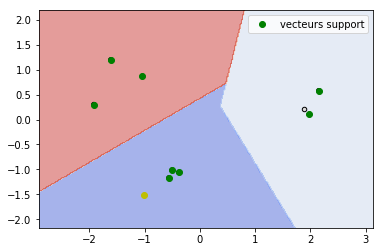

In [0]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train_1[:, 0], X_train_1[:, 1]
xx, yy = make_meshgrid(X0, X1)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X0, X1, c=y_train_1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.plot(sv[:,0],sv[:,1],'go',label='vecteurs support')
plt.plot(X_test_1[3,0],X_test_1[3,1],'yo')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.show()

In [0]:
x=X_train_1[0,:].reshape(1,-1)
x

array([[-0.383562  , -1.06128804]])

In [0]:
scores=svm.decision_function(x)
scores

array([[ 2.5       , -0.30547398,  0.80547398]])

In [0]:
np.argmax(scores, axis=1)

array([0], dtype=int64)

In [0]:
svm.predict(x)

array([0])